In [32]:
%run bk_RW_catalogue.ipynb

import pandas as pd
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


In [33]:
df_delta = pd.read_csv('df_delta.csv')
df_VG = pd.read_csv('df_VG_labeled.csv')
df_clustered = pd.read_csv('df_clusterd.csv')

df_clustered = df_clustered.set_index(['gauge_id','fillNumber'], drop=True)
df_raw = pd.read_csv('df_raw.csv')
df_raw = df_raw.set_index(['gauge_id','fillNumber'], drop=True)

In [34]:
display(df_VG.shape)
display(df_VG['y'].value_counts())
df_delta.groupby('fillNumber').count()

(811, 3)

ok       455
delta    147
noise    130
spike     79
Name: y, dtype: int64

,gauge_id,y
fillNumber,,
2009,12,12
2010,10,10
2022,21,21
2025,13,13
2040,6,6
2216,29,29
5979,42,42
5980,6,6
6639,4,4


In [64]:
df_raw.groupby('fillNumber').count()

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
fillNumber,,,,,,,,,,,,,,,,,,,,,
2009,673,673,673,673,673,673,673,673,673,673,...,673,673,673,673,673,673,673,673,673,673
2010,676,676,676,676,676,676,676,676,676,676,...,676,676,676,676,676,676,676,676,676,676
2011,673,673,673,673,673,673,673,673,673,673,...,673,673,673,673,673,673,673,673,673,673
2022,672,672,672,672,672,672,672,672,672,672,...,672,672,672,672,672,672,672,672,672,672
2025,673,673,673,673,673,673,673,673,673,673,...,673,673,673,673,673,673,673,673,673,673
2040,670,670,670,670,670,670,670,670,670,670,...,670,670,670,670,670,670,670,670,670,670
2216,672,672,672,672,672,672,672,672,672,672,...,672,672,672,672,672,672,672,672,672,672
5979,808,808,808,808,808,808,808,808,808,808,...,808,808,808,808,808,808,808,808,808,808
5980,807,807,807,807,807,807,807,807,807,807,...,807,807,807,807,807,807,807,807,807,807


In [62]:
file = 'df_ok.csv'
verbose = True
fill = 6639
imax =4

In [63]:
i=0
for (gauge_id, fillNumber), row in df_raw.sample(frac=1, random_state=42).iterrows():
    
    if (i < imax) and entry_in_catalogue(file, gauge_id, fillNumber, verbose=verbose) == False:
        if fillNumber == fill:
            plt.figure()
            plt.plot(range(3000), row, label=gauge_id)
            plt.legend()
            plt.show()
            
            resp = input(">>>")
            
            if resp == 'ok':
                i=i+1
                add_to_catalogue(file, gauge_id, fillNumber, resp, verbose=True)
            else:
                print('fill_'+str(fillNumber)+'_'+gauge_id+' skipped')
        

entry VGPB.2.7L1.R.PR, 2010 already in the catalogue
entry VGPB.4.6R2.R.PR, 2009 already in the catalogue
entry VGPB.2.5R3.R.PR, 5980 already in the catalogue
entry VGPB.812.5R4.R.PR, 2025 already in the catalogue
entry VGPB.235.6L5.R.PR, 2022 already in the catalogue
entry VGPB.232.6R1.R.PR, 5980 already in the catalogue
entry VGPB.4.7L3.R.PR, 2040 already in the catalogue
entry VGPB.598.6R8.R.PR, 2025 already in the catalogue
entry VGPB.4.7L2.B.PR, 2040 already in the catalogue
entry VGPB.4.6L2.R.PR, 5980 already in the catalogue
entry VGI.951.4L6.R.PR, 2040 already in the catalogue
entry VGPB.7.4R1.X.PR, 2025 already in the catalogue
entry VGPB.4.5L7.R.PR, 2216 already in the catalogue
entry VGPB.192.5L2.B.PR, 2025 already in the catalogue
entry VGPB.79.6L7.B.PR, 2216 already in the catalogue
entry VGI.128.7R7.B.PR, 2025 already in the catalogue
entry VGPB.195.5L2.B.PR, 2216 already in the catalogue
entry VGPB.820.5L4.R.PR, 2216 already in the catalogue
entry VGPB.470.6L8.B.PR, 5980

In [61]:
df_ok = pd.read_csv('df_ok.csv')
df_ok.groupby('fillNumber').count()

,probe_id,y
fillNumber,,
2009,12,12
2010,10,10
2022,21,21
2025,13,13
2040,6,6
2216,29,29
5979,42,42
5980,6,6


## Splitting the dataset

In [38]:
df_delta = df_VG[df_VG.y == 'delta']
df_delta.head()
df_ok = df_VG[df_VG.y == 'ok']
df_ok.groupby('fillNumber').count()

,gauge_id,fillNumber,y
0,VGI.1025.5L4.B.PR,2216,ok
1,VGI.1025.5L4.R.PR,2216,ok
2,VGI.1025.5R4.B.PR,2216,ok
3,VGI.1025.5R4.R.PR,2216,ok
4,VGI.1098.4L6.R.PR,2216,ok


In [10]:
from sklearn.model_selection import ShuffleSplit


split = ShuffleSplit(n_splits=1, test_size=0.65, random_state=42)
for train_index, test_index in split.split(df_ok):
    df_ok_train = df_ok.iloc[train_index]
    df_ok_test = df_ok.iloc[test_index]

In [11]:
df_ok_train.y.value_counts()

ok    159
Name: y, dtype: int64

In [12]:
df_raw= pd.read_csv('df_raw.csv')
df_merged = pd.merge(df_raw,df_ok, on =['gauge_id','fillNumber'])
df_merged = df_merged.set_index(['gauge_id','fillNumber'], drop=True)

ok


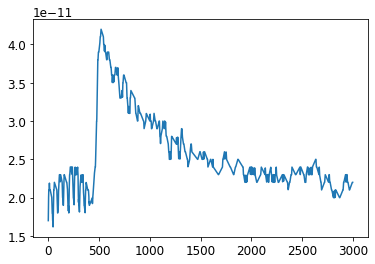

ok


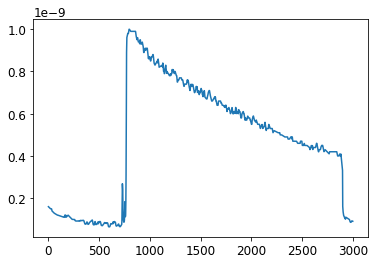

ok


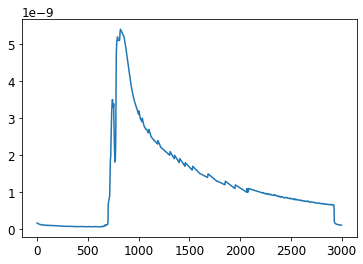

ok


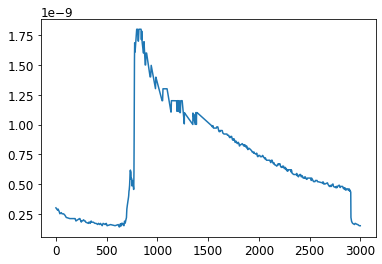

ok


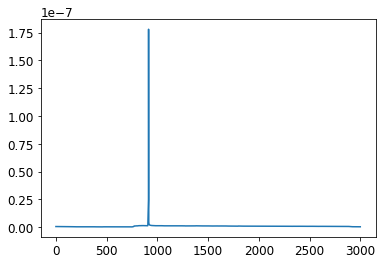

ok


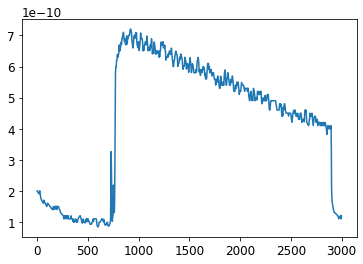

ok


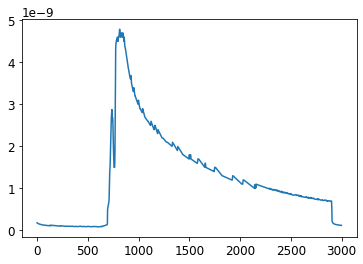

ok


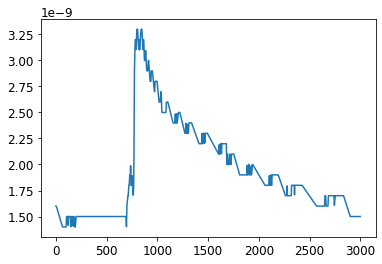

ok


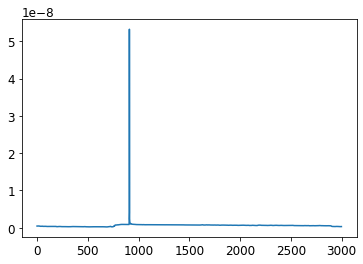

ok


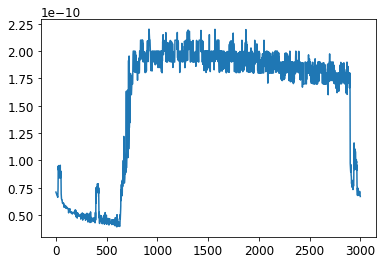

ok


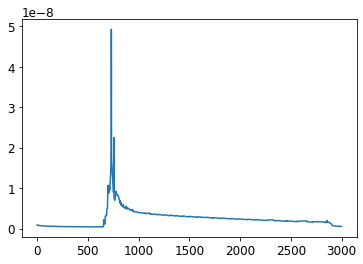

ok


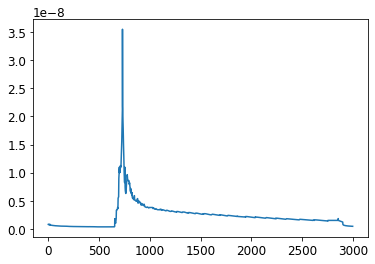

ok


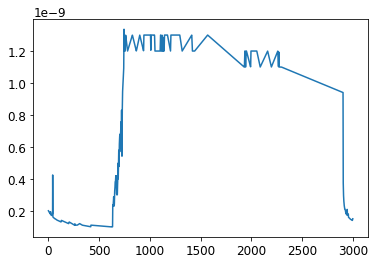

ok


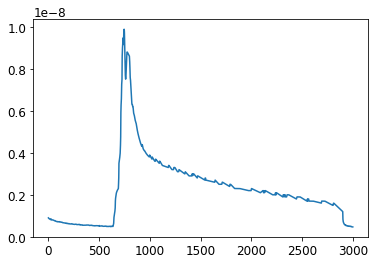

ok


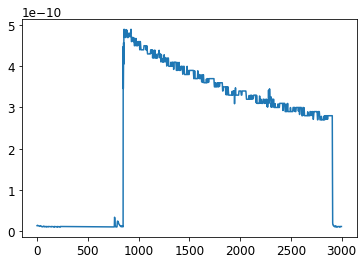

ok


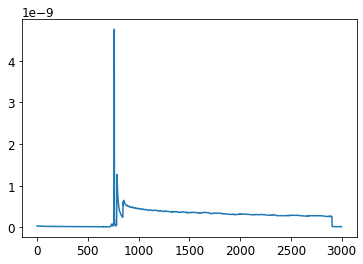

ok


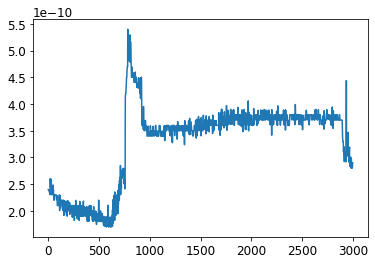

ok


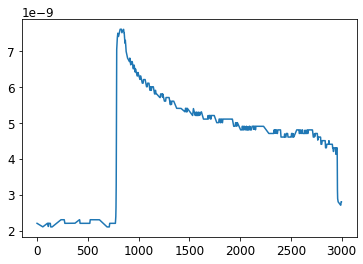

ok


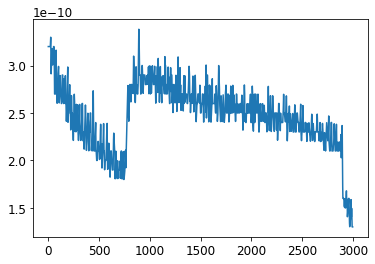

ok


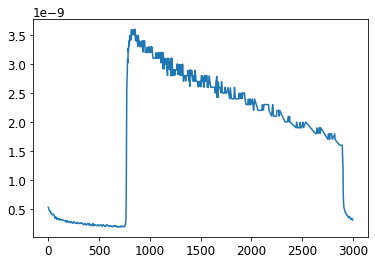

ok


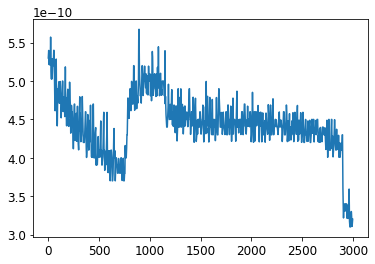

ok


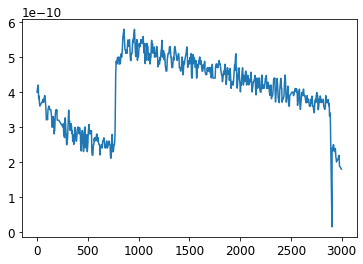

ok


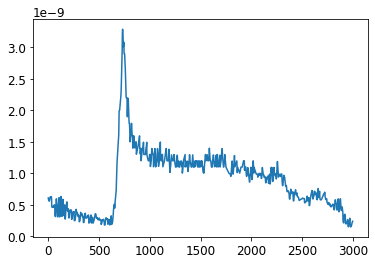

ok


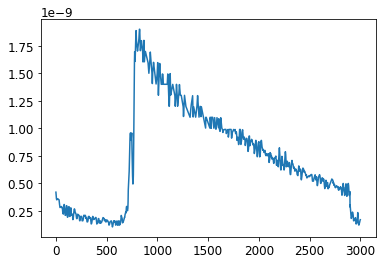

ok


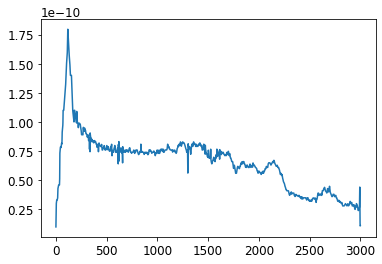

ok


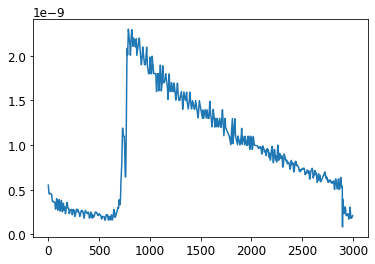

ok


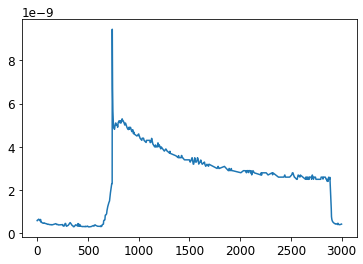

ok


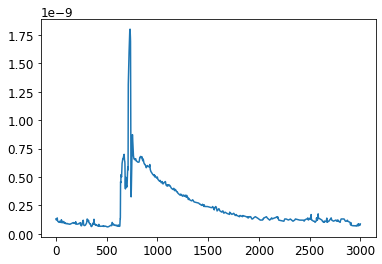

ok


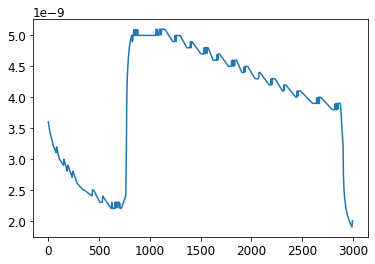

ok


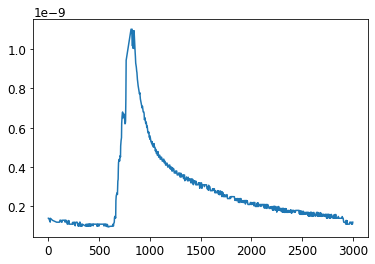

ok


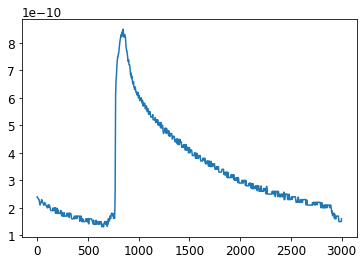

ok


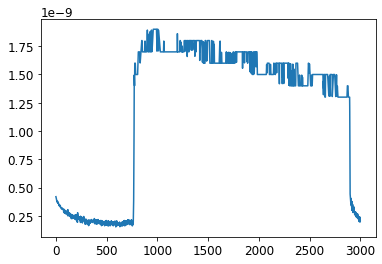

ok


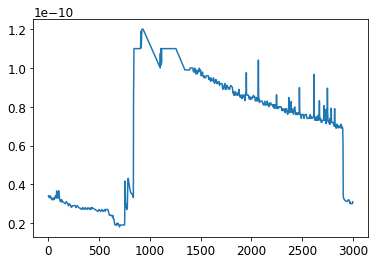

ok


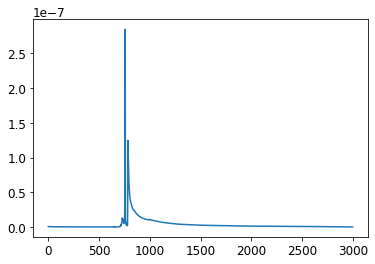

ok


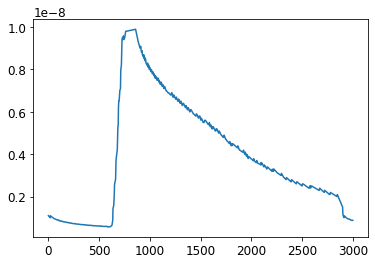

ok


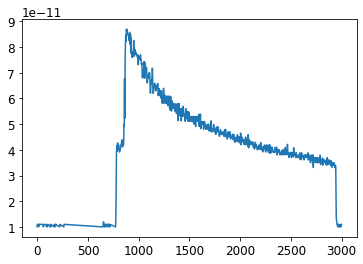

ok


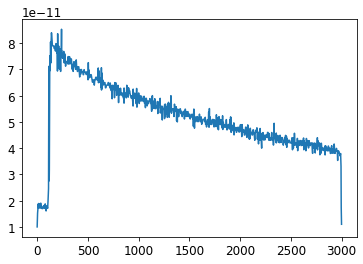

ok


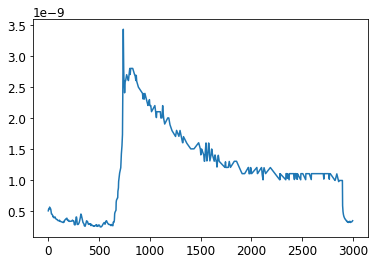

ok


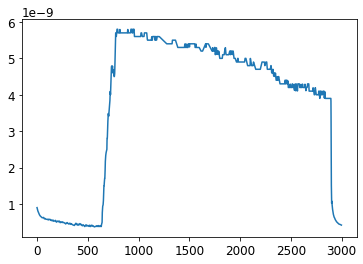

ok


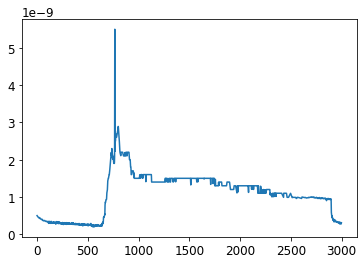

ok


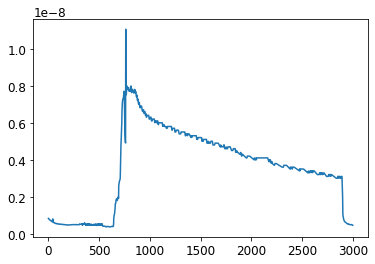

ok


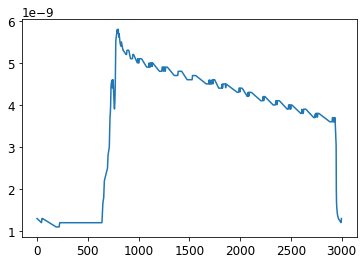

ok


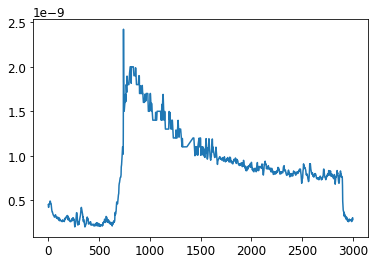

ok


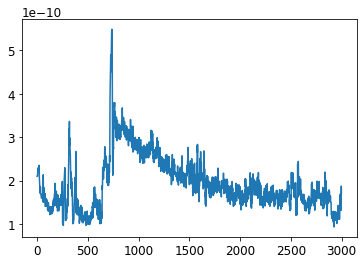

ok


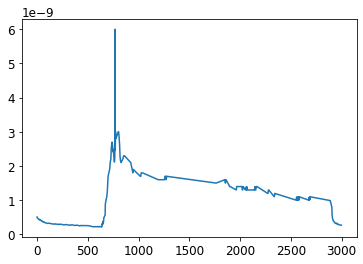

ok


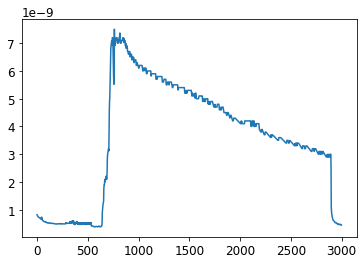

ok


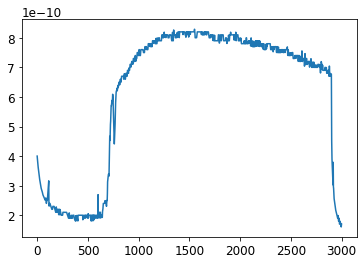

ok


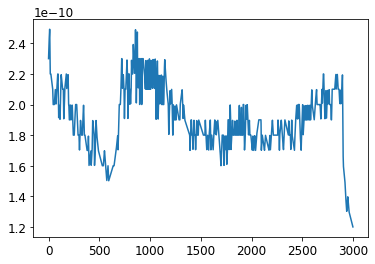

ok


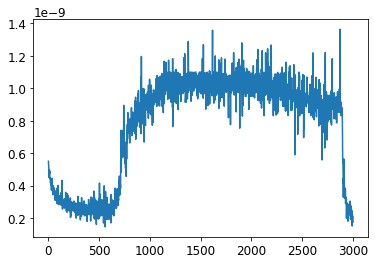

ok


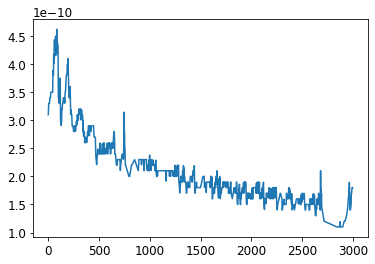

In [13]:
i=0
for index, row in df_merged.iterrows():
    if i<50:
        print(row[-1])
        plt.figure()
        plt.plot(range(3000), row[:-1])
        plt.show()


    i+=1

In [26]:
df_final = df_delta.append(df_ok_train, sort=False)

In [36]:
df_final.groupby(['fillNumber', 'y']).count()

gauge_id
fillNumber y              
2009       delta        12
2010       delta        10
2022       delta        21
2025       delta        13
2040       delta         6
2216       delta        29
           ok          150
5979       delta        42
           ok            2
5980       delta         6
           ok            4
6639       delta         4
           ok            1
6662       delta         4
           ok            2

In [37]:
df_final.to_csv('df_VG_balanced.csv', index=False)

In [19]:
df_delta = df_VG[df_VG.y == 'delta']
df_delta.to_csv('df_delta.csv', index=False)